## RUSSIAN TROLL TWEETS CLUSTERING
### K-Means
#### CSCI 113i Group 3

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [25]:
full_df = pd.read_excel("russian_tweet_cleaned.xlsx", index_col=None)
full_df

,account_type,external_author_id,author,content,region,language,publish_date,publish_year,publish_month,publish_day,following,followers,updates,post_type,retweet,account_category,new_june_2018,tweet_id,follower_change
0,Russian,2499828724,_ANNA_SANNA_,Омичи отметят День молодежи капойэрой и карибс...,Unknown,Russian,2015-06-26 13:11:00,2015,6,26,664,151,1504,RETWEET,1,NonEnglish,1,614420771641925632,0
1,Russian,2499828724,_ANNA_SANNA_,Маркин о желании Пономарева «дать по морде люд...,Unknown,Russian,2015-07-15 17:56:00,2015,7,15,661,152,1528,RETWEET,1,NonEnglish,1,621377816899227648,1
2,Russian,2499828724,_ANNA_SANNA_,Биржевой курс евро опустился ниже 62 руб. htt...,Unknown,Russian,2015-07-16 10:53:00,2015,7,16,660,152,1532,RETWEET,1,NonEnglish,1,621633676607160320,0
3,Russian,2499828724,_ANNA_SANNA_,Адвокат: Савченко этапируют из Москвы http://t...,Unknown,Russian,2015-07-16 14:31:00,2015,7,16,660,152,1536,RETWEET,1,NonEnglish,1,621688618629898240,0
4,Russian,2499828724,_ANNA_SANNA_,Крушение Boeing-777 будут расследовать еще сем...,Unknown,Russian,2015-07-17 15:33:00,2015,7,17,660,151,1540,RETWEET,1,NonEnglish,1,622066579740721152,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Left,1701955429,ZZZACHARYZZZ,👇🏾 A mood https://t.co/elCscMpdeO,United States,English,2017-08-08 19:05:00,2017,8,8,792,916,6758,RETWEET,1,LeftTroll,0,894997896533336064,0
1048571,Left,1701955429,ZZZACHARYZZZ,Lmao this picture https://t.co/iazZgZ3S2q,United States,English,2017-08-08 21:05:00,2017,8,8,792,915,6759,RETWEET,1,LeftTroll,0,895028320307482624,-1
1048572,Left,1701955429,ZZZACHARYZZZ,Hey u guys. I’m so excited for the State of th...,United States,English,2017-08-08 21:06:00,2017,8,8,792,915,6760,RETWEET,1,LeftTroll,0,895028350460284928,0
1048573,Left,1701955429,ZZZACHARYZZZ,*Find out who's playing from your area. Tune i...,United States,English,2017-08-08 23:06:00,2017,8,8,792,916,6761,RETWEET,1,LeftTroll,0,895058767133515776,1


In [2]:
# Load russian troll tweet dataset
troll_df = pd.read_excel("russian_tweet_cleaned.xlsx", index_col=None)
troll_df = troll_df.drop(columns=["account_type","external_author_id", "author", "publish_date", "tweet_id", "content", "post_type", "publish_month", "publish_day","region","language","account_category","publish_year","retweet", "new_june_2018"])
troll_df

,following,followers,updates,follower_change
0,664,151,1504,0
1,661,152,1528,1
2,660,152,1532,0
3,660,152,1536,0
4,660,151,1540,-1
...,...,...,...,...
1048570,792,916,6758,0
1048571,792,915,6759,-1
1048572,792,915,6760,0
1048573,792,916,6761,1


In [3]:
# Separate and normalize relevant features

normalized_troll_df = MinMaxScaler().fit_transform(troll_df)

normalized_troll_df = pd.DataFrame(normalized_troll_df, columns=["following","followers","updates","follower_change"])
normalized_troll_df

,following,followers,updates,follower_change
0,0.008713,0.000601,0.023304,0.499985
1,0.008673,0.000605,0.023676,0.499993
2,0.008660,0.000605,0.023738,0.499985
3,0.008660,0.000605,0.023800,0.499985
4,0.008660,0.000601,0.023862,0.499978
...,...,...,...,...
1048570,0.010392,0.003645,0.104768,0.499985
1048571,0.010392,0.003641,0.104783,0.499978
1048572,0.010392,0.003641,0.104799,0.499985
1048573,0.010392,0.003645,0.104814,0.499993


## K-Means Clustering

In [21]:
pre_cluster_troll_df = normalized_troll_df

k_range = range(2, 15)

k_list = []
k_inertia_list = []

for k in k_range:
    km_model = KMeans(n_clusters=k, n_init="auto", random_state=1)
    km_model.fit(pre_cluster_troll_df)
    k_inertia_list.append(km_model.inertia_)
    
    k_list.append(k)
    
    print(str(k) + ": " + str(round(km_model.inertia_, 4)))

2: 26074.4378
3: 18914.9236
4: 12779.8467
5: 10790.8699
6: 8727.701
7: 7556.4852
8: 6174.0462
9: 5293.1488
10: 4602.32
11: 3940.8119
12: 3550.3635
13: 3308.5433
14: 2887.1548


#### Elbow Method to find number of K clusters

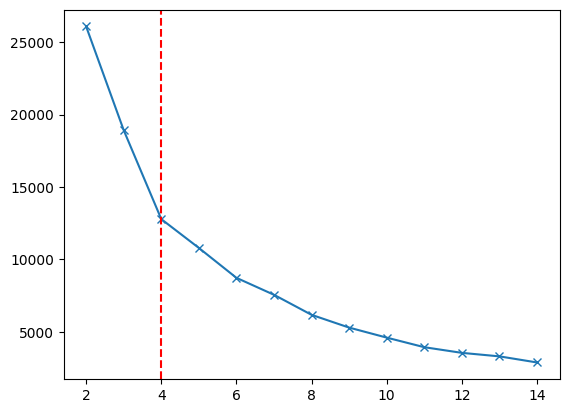

In [22]:
plt.plot(k_list, k_inertia_list, 'x-')

# plot a vertical line at x
plt.axvline(x=4, color='r', linestyle='--')
plt.title('Elbow Curve')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4,n_init=10,random_state=0).fit(pre_cluster_troll_df)
kmeans.fit(pre_cluster_troll_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


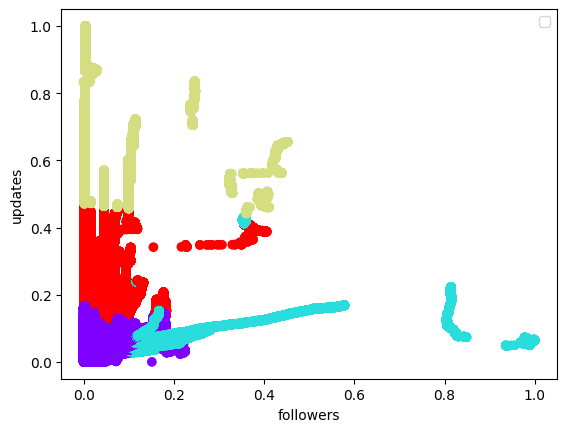

In [14]:
plt.scatter(pre_cluster_troll_df["followers"], pre_cluster_troll_df["updates"], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("followers")
plt.ylabel("updates")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


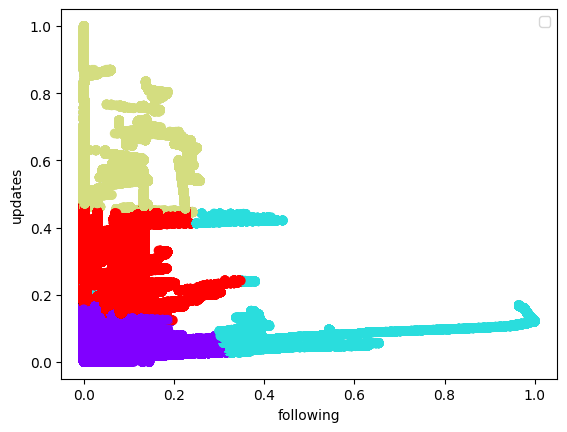

In [17]:
plt.scatter(pre_cluster_troll_df["following"], pre_cluster_troll_df["updates"], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("following")
plt.ylabel("updates")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


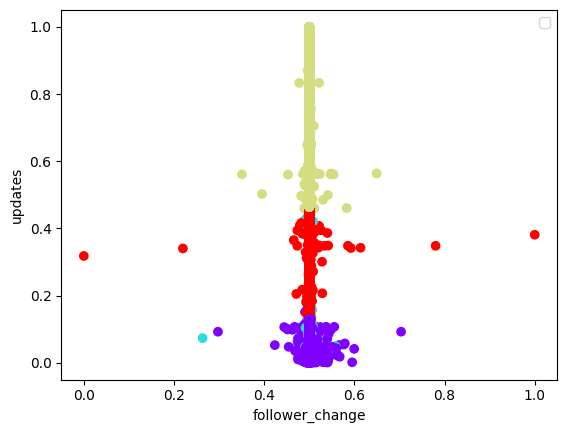

In [18]:
plt.scatter(pre_cluster_troll_df["follower_change"], pre_cluster_troll_df["updates"], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("follower_change")
plt.ylabel("updates")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


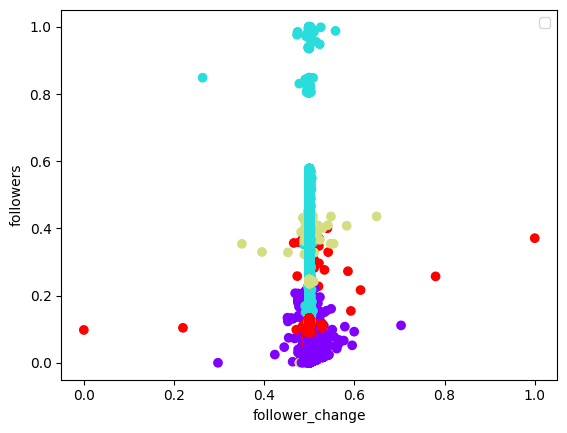

In [19]:
plt.scatter(pre_cluster_troll_df["follower_change"], pre_cluster_troll_df["followers"], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("follower_change")
plt.ylabel("followers")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


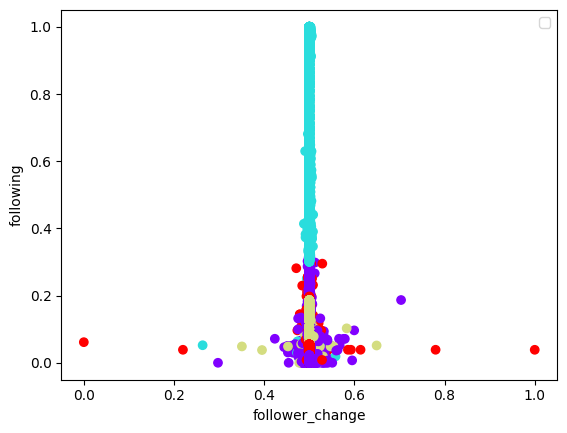

In [23]:
plt.scatter(pre_cluster_troll_df["follower_change"], pre_cluster_troll_df["following"], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("follower_change")
plt.ylabel("following")
plt.legend()
plt.show()